In [1]:
#Counts obtained from the Delaware Valley Regional Planning Commission (https://www.dvrpc.org/webmaps/TrafficCounts)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import binprism as bp

# Estimate profiles from observed traffic counts

In [2]:
eb_counts = [590, 353, 301, 230, 393, 655, 1469, 2067, 2549, 2375, 1783, 2076,
             2193, 2017, 2513, 3262, 3294, 2915, 2657, 2412, 2323, 1928, 1925, 1118]
wb_counts = [387, 316, 237, 219, 442, 1491, 2472, 2716, 2809, 2294, 2159, 1991,
             2380, 2119, 2052, 2333, 2434, 2122, 2188, 2385, 1821, 1760, 1314, 836]
hours = list(range(24))
n_harmonics = 6
time_range = (0, 24)
eb_profile = bp.fit(eb_counts, hours, n_harmonics, time_range)
wb_profile = bp.fit(wb_counts, hours, n_harmonics, time_range)

# Plot estimated profiles against observed counts

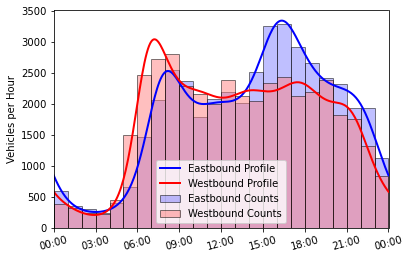

In [3]:
plt.bar(hours, eb_counts, 24*[1], align = 'edge', alpha = 0.5,
        facecolor = '#8080ff', edgecolor = 'k', label = 'Eastbound Counts')
plt.bar(hours, wb_counts, 24*[1], align = 'edge', alpha = 0.5,
        facecolor = '#ff8080', edgecolor = 'k', label = 'Westbound Counts')
eb_profile.plot(288, color = 'b', linewidth = 2, label = 'Eastbound Profile')
wb_profile.plot(288, color = 'r', linewidth = 2, label = 'Westbound Profile')
plt.xlim(0, 24)
plt.ylabel('Vehicles per Hour')
plt.xticks(list(range(0, 25, 3)),
           [eb_profile.time2hhmm(i % 24) for i in range(0, 25, 3)],
           rotation = 15)
plt.legend(loc = 'best')
plt.show()

# Estimate 15-minute counts from profiles

In [4]:
import pandas as pd
from datetime import datetime, timedelta
times = []
start_time = datetime(2018, 3, 12, 5)
for i in range(20):
    times.append(start_time.strftime('%H:%M'))
    start_time += timedelta(minutes = 15)
eb_15min_counts = eb_profile[5:10:0.25]
wb_15min_counts = wb_profile[5:10:0.25]
counts_15min = pd.DataFrame({'Start Time': times, 'Eastbound': eb_15min_counts, 'Westbound': wb_15min_counts})
counts_15min = counts_15min.set_index('Start Time')
counts_15min

,Eastbound,Westbound
Start Time,,
05:00,128.482043,223.203079
05:15,152.721965,289.143493
05:30,183.557068,368.050324
05:45,221.887822,455.916214
06:00,268.113731,545.592935
06:15,321.726568,627.940606
06:30,380.927259,694.101211
06:45,442.451057,737.993034
07:00,501.797725,757.862657


# Simulate a day of Eastbound traffic

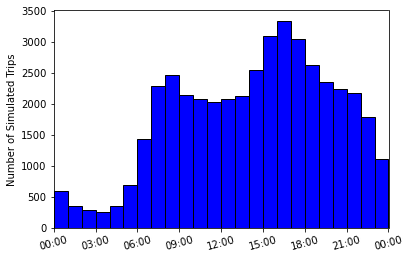

In [5]:
sim_trips = eb_profile.sim(int(eb_profile.total))
plt.hist(sim_trips, 24, facecolor = 'b', edgecolor = 'k')
plt.xlim(0, 24)
plt.xticks(list(range(0, 25, 3)),
           [eb_profile.time2hhmm(i%24) for i in range(0, 25, 3)],
           rotation = 15)
plt.ylabel('Number of Simulated Trips')
plt.show()

# Compare with observed counts

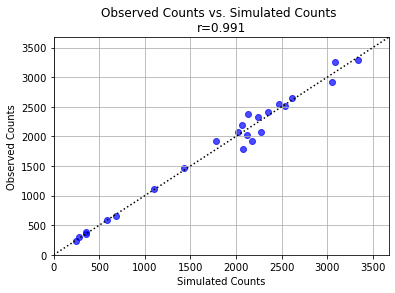

In [6]:
from scipy.stats import pearsonr
sim_counts = np.histogram(sim_trips, 24)[0]
(r, p) = pearsonr(sim_counts, eb_counts)
plot_range = (0, 1.1*max(max(eb_counts), max(sim_counts)))
plt.scatter(sim_counts, eb_counts, color = 'b', alpha = 0.7)
plt.plot(plot_range, plot_range, color = 'k', linestyle = ':')
plt.xlabel('Simulated Counts')
plt.ylabel('Observed Counts')
plt.xlim(plot_range)
plt.ylim(plot_range)
plt.grid(True)
plt.title('Observed Counts vs. Simulated Counts \nr={}'.format(round(r, 3)))
plt.show()